# Database Creation - SQLAlchemy with SQLite

# SQLAlchemy offers several benefits over the raw SQL approach, including:

### Cleaner code: 
                Having SQL code as Python strings gets messy pretty quickly.
### More secure code: 
                Using SQLAlchemy's ORM functionalities can help mitigate against vulnerabilities such as SQL injection,
### Simpler logic:  
                SQLAlchemy allows us to abstract all of our database logic into Python objects. 
                Instead of having to think on a table, row, and column level, 
                we can consider everything on a class, instance, and attribute level.

# SQLAlchemy at three different layers of abstraction. 

**The lowest layer** is using only SQLAlchemy's engine component to execute raw SQL. 

**The middle layer** is using SQLAlchemy's expression language to build SQL statements in a more Pythonic way than using raw SQL strings. 

**The highest extraction layer** is using SQLAlchemy's full Object Relational Mapping (ORM) capabilities which allows one to think in terms of Python classes and objects instead of database tables and connections.

In [4]:
# !pip install SQLAlchemy
import pandas as pd

In [1]:
import sqlalchemy
from sqlalchemy.ext.declarative import declarative_base
# Importing the declarative_base object, which connects the database engine to the SQLAlchemy functionality of the models(tables).


In [ ]:
# Connecting to PostgreSQL Database
# from urllib.parse import quote 
# engine = sqlalchemy.create_engine('postgresql://postgres:%s@localhost:5433/movielens_db' % quote("pass@123"))

# Why SQLite?

##  It offers a full-featured relational database management system (RDBMS) that works with a single file to maintain all the database functionality.

##  It also has the advantage of not requiring a separate database server to function. The database file format is cross-platform and accessible to any programming language that supports SQLite.

In [43]:
engine = sqlalchemy.create_engine('sqlite:///movielens_test7.db', echo=True)
Base = declarative_base()
# creates the Base class, which is what all models(tables) inherit from and how they get SQLAlchemy ORM functionality.
Base.metadata.create_all(engine)

2022-01-13 02:29:04,511 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-01-13 02:29:04,511 INFO sqlalchemy.engine.Engine COMMIT


## Since we will be deploying our Recommender System on Heroku, we will be loading our tables into a database file(.db) and make it reside in the Heroku server. We don't have to worry about creating a new database connection everytime a new client uses this Application. 

## Multiple users can parallely use the application without any communications bottleneck because every user will have their own database instance.

In [21]:
# Creating tables from our pickle files
import pickle
import pandas as pd

movies_data = pd.DataFrame(pickle.load(open("movies_data.pkl", 'rb')))
avg_ratings = pd.DataFrame(pickle.load(open("avg_ratings.pkl", 'rb')))
links = pd.DataFrame(pickle.load(open("links.pkl", 'rb')))

#(pd.DataFrame(pickle.load(open("movies_data.pkl", 'rb')))).to_sql('movies_data',con=engine)(index=False)
#(pd.DataFrame(pickle.load(open("avg_ratings.pkl", 'rb')))).to_sql('avg_ratings',con=engine)
#(pd.DataFrame(pickle.load(open("links.pkl", 'rb')))).to_sql('links',con=engine)


# Defining our schema
### Note - Can't drop the index column when a pickle file is directly loaded in a Pandas Dataframe

In [22]:
movies_data.drop(['genres'],axis=1,inplace=True)
movies_data.head()

,movieId,title
62216,208297,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth..."
11420,51372,"""Great Performances"" Cats (1998)"
30582,136604,#1 Cheerleader Camp (2010)
51787,183901,#Captured (2017)
57250,195955,#Female Pleasure (2018)


In [37]:
#avg_ratings.drop(['title'],axis=1,inplace=True)
avg_ratings.head()

,movieId,genres,avg_rating,num_ratings,lap_avg
0,208297,Documentary|Drama,3.000000,1,3.000000
1,51372,Musical,2.896648,179,2.897790
2,136604,Comedy|Drama,2.111111,9,2.272727
3,183901,Horror,3.750000,2,3.375000
4,195955,Documentary,3.666667,3,3.400000


In [44]:
movies_data.to_sql('movies_data',con=engine)
avg_ratings.to_sql('avg_ratings',con=engine)
links.to_sql('links',con=engine)

2022-01-13 02:29:12,351 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("movies_data")
2022-01-13 02:29:12,352 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-13 02:29:12,353 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("movies_data")
2022-01-13 02:29:12,354 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-13 02:29:12,359 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-01-13 02:29:12,361 INFO sqlalchemy.engine.Engine 
CREATE TABLE movies_data (
	"index" BIGINT, 
	"movieId" BIGINT, 
	title TEXT
)


2022-01-13 02:29:12,361 INFO sqlalchemy.engine.Engine [no key 0.00084s] ()
2022-01-13 02:29:12,374 INFO sqlalchemy.engine.Engine CREATE INDEX ix_movies_data_index ON movies_data ("index")
2022-01-13 02:29:12,375 INFO sqlalchemy.engine.Engine [no key 0.00122s] ()
2022-01-13 02:29:12,384 INFO sqlalchemy.engine.Engine COMMIT
2022-01-13 02:29:12,399 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-01-13 02:29:12,823 INFO sqlalchemy.engine.Engine INSERT INTO movies_data ("

# Making Schema and an ER Diagram Using the DBSchema Application: 
## A gui application where a user just have to upload the .db file and can graphically design the schema

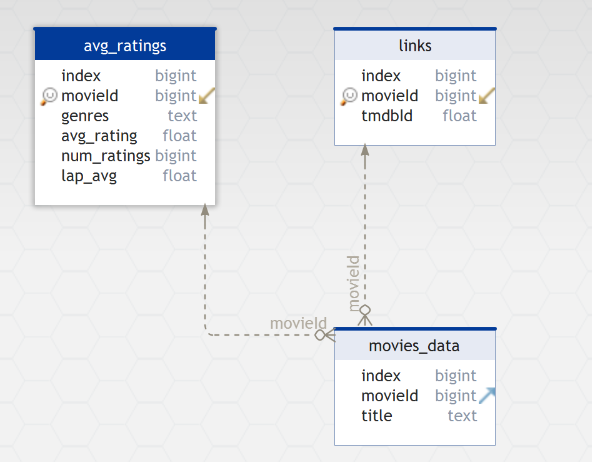

In [45]:
from IPython.display import Image
Image("er.png")

# Why SQL approach over NOSQL ?

# Advantages:
### The Data after all the preprocessing is not that Big. (movielens.db size = 11mb) - Can easily reside on the server with all the tables and relations.
### The data is not schema independent.(In nosql data can lie as it is with no or few relations)
### Upon Expansion of the csv files, things like user preferences and avg_ratings might change, we need a database system which can update things accordingly - Referential Integrity is required.
### Layout is priority to understand logical relations between fields across data when solving complex tasks like recommending movies to a given user based on his taste that he hasn't watched yet.
### There are not much complex queries which will affect the data retreival speeds.
### Duplications not allowed(We can't have duplicate userids or ratings)
### Here we know how to map the objects in code to the database.
### Nosql falls short when we have a lot of sparse but related data(Eg. tags.csv,ratings.csv) that is worked upon often.
### ACID Compliant- Data validity is guaranteed.
### Added security against attacks like SQL Injections.

# Disadvantages:
## Can't use DDL to modify the table 
### Data fetching  not as fast as nosql.
### Not as efficient as nosql when there are a huge number of reads operations per unit time.
### New data added with a lot of flexibility
### Scaling not as easy as nosql (Both Horizontal and Vertical)

## Note:

### HORIZONTAL SCALING:
#### Modern SQL Databases like cockroachDB comes with the facility of it.

### VERTICAL SCALING:
#### 3-4 months ago, Oracle introduced heatwave enginefor Oracle MySQL Database Service.  It's a massively parallel, hybrid, columnar, query-processing engine with state-of-art algorithms for distributed query processing which provide very high performance for queries.

In [8]:
pd.read_sql("SELECT * FROM avg_ratings limit 10",con=engine)

2022-01-13 01:26:29,627 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM avg_ratings limit 10")
2022-01-13 01:26:29,628 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-13 01:26:29,629 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM avg_ratings limit 10")
2022-01-13 01:26:29,630 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-13 01:26:29,632 INFO sqlalchemy.engine.Engine SELECT * FROM avg_ratings limit 10
2022-01-13 01:26:29,633 INFO sqlalchemy.engine.Engine [raw sql] ()


,index,movieId,title,genres,avg_rating,num_ratings,lap_avg
0,0,208297,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",Documentary|Drama,3.000000,1,3.000000
1,1,51372,"""Great Performances"" Cats (1998)",Musical,2.896648,179,2.897790
2,2,136604,#1 Cheerleader Camp (2010),Comedy|Drama,2.111111,9,2.272727
3,3,183901,#Captured (2017),Horror,3.750000,2,3.375000
4,4,195955,#Female Pleasure (2018),Documentary,3.666667,3,3.400000
5,5,203417,#FollowMe (2019),Horror|Thriller,2.083333,6,2.312500
6,6,151789,#Horror (2015),Drama|Horror|Mystery|Thriller,2.086957,23,2.160000
7,7,179057,#Lucky Number (2015),Comedy,3.000000,1,3.000000
8,8,190861,#SCREAMERS (2016),Horror,2.333333,3,2.600000
9,9,201174,#SquadGoals (2018),Drama|Thriller,1.000000,1,2.333333


In [10]:
pd.read_sql("SELECT * FROM movies_data limit 10",con=engine)

2022-01-13 01:27:15,741 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM movies_data limit 10")
2022-01-13 01:27:15,741 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-13 01:27:15,742 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM movies_data limit 10")
2022-01-13 01:27:15,743 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-13 01:27:15,744 INFO sqlalchemy.engine.Engine SELECT * FROM movies_data limit 10
2022-01-13 01:27:15,745 INFO sqlalchemy.engine.Engine [raw sql] ()


,index,movieId,title,genres
0,62216,208297,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",Documentary|Drama
1,11420,51372,"""Great Performances"" Cats (1998)",Musical
2,30582,136604,#1 Cheerleader Camp (2010),Comedy|Drama
3,51787,183901,#Captured (2017),Horror
4,57250,195955,#Female Pleasure (2018),Documentary
5,60482,203417,#FollowMe (2019),Horror|Thriller
6,37056,151789,#Horror (2015),Drama|Horror|Mystery|Thriller
7,49523,179057,#Lucky Number (2015),Comedy
8,54986,190861,#SCREAMERS (2016),Horror
9,59587,201174,#SquadGoals (2018),Drama|Thriller


In [11]:
pd.read_sql("SELECT * FROM links limit 10",con=engine)

2022-01-13 01:27:39,381 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM links limit 10")
2022-01-13 01:27:39,382 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-13 01:27:39,383 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM links limit 10")
2022-01-13 01:27:39,384 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-13 01:27:39,386 INFO sqlalchemy.engine.Engine SELECT * FROM links limit 10
2022-01-13 01:27:39,387 INFO sqlalchemy.engine.Engine [raw sql] ()


,index,movieId,tmdbId
0,0,1,862.0
1,1,2,8844.0
2,2,3,15602.0
3,3,4,31357.0
4,4,5,11862.0
5,5,6,949.0
6,6,7,11860.0
7,7,8,45325.0
8,8,9,9091.0
9,9,10,710.0


# Files like ratings.csv,tags.csv,genome_data doesn't need to be stored as SQL tables because they don't have much role in the task solutions and will only add to the complexity of database

# Task 3 example- Main solutions in the App

In [33]:
pd.read_sql("SELECT title,genres FROM avg_ratings where genres like '%Drama%' order by lap_avg desc limit 10",con=engine)

2022-01-12 02:36:43,864 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT title,genres FROM avg_ratings where genres like '%Drama%' order by lap_avg desc limit 10")
2022-01-12 02:36:43,865 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-12 02:36:43,866 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT title,genres FROM avg_ratings where genres like '%Drama%' order by lap_avg desc limit 10")
2022-01-12 02:36:43,867 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-12 02:36:43,869 INFO sqlalchemy.engine.Engine SELECT title,genres FROM avg_ratings where genres like '%Drama%' order by lap_avg desc limit 10
2022-01-12 02:36:43,870 INFO sqlalchemy.engine.Engine [raw sql] ()


,title,genres
0,"Shawshank Redemption, The (1994)",Crime|Drama
1,Band of Brothers (2001),Action|Drama|War
2,"Godfather, The (1972)",Crime|Drama
3,"Godfather: Part II, The (1974)",Crime|Drama
4,Twin Peaks (1989),Drama|Mystery
5,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama
6,Over the Garden Wall (2013),Adventure|Animation|Drama
7,Schindler's List (1993),Drama|War
8,12 Angry Men (1957),Drama
9,Fight Club (1999),Action|Crime|Drama|Thriller
